In [433]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline, make_pipeline


In [434]:
df = pd.read_csv(r"M:\Machine Learning\data\xsl\train.csv")

In [435]:
df.drop(columns=['PassengerId', 'Name', 'Ticket',	'Cabin'	], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [436]:
print(df.isnull().sum())
# df['Embarked'] = df['Embarked'].ffill()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [437]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None


In [438]:
print(df.describe())

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


## Univariate Analysis

### Categorical

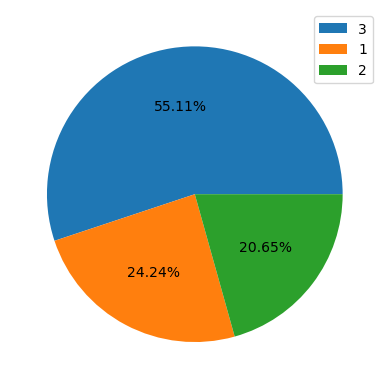

In [439]:
plt.pie(df['Pclass'].value_counts(), autopct="%.2f%%")
plt.legend(df['Pclass'].unique())
plt.show()

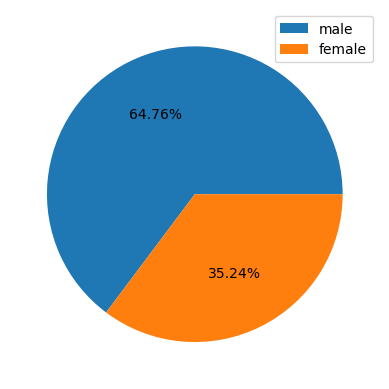

In [440]:
plt.pie(df['Sex'].value_counts(), autopct="%.2f%%")
plt.legend(df['Sex'])
plt.show()

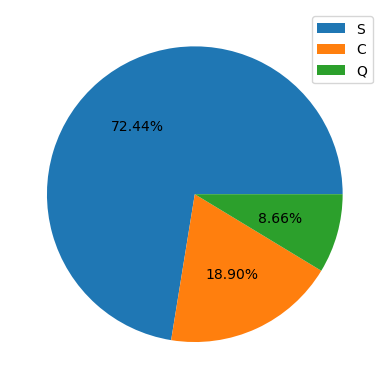

In [441]:
plt.pie(df['Embarked'].value_counts(), autopct="%.2f%%")
plt.legend(df['Embarked'].unique())
plt.show()

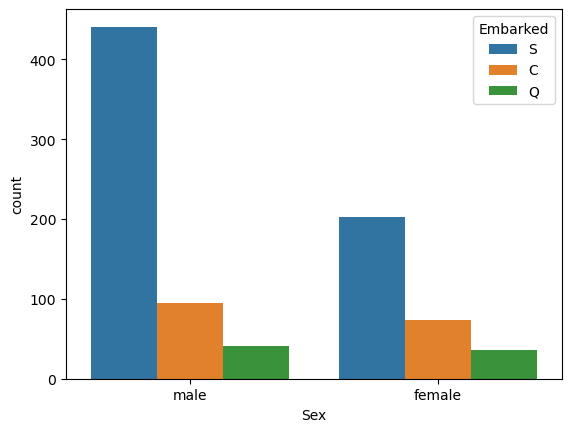

In [442]:
sns.countplot(x=df['Sex'], hue=df['Embarked'])
plt.show()

## Remove Outliers

### Numerical

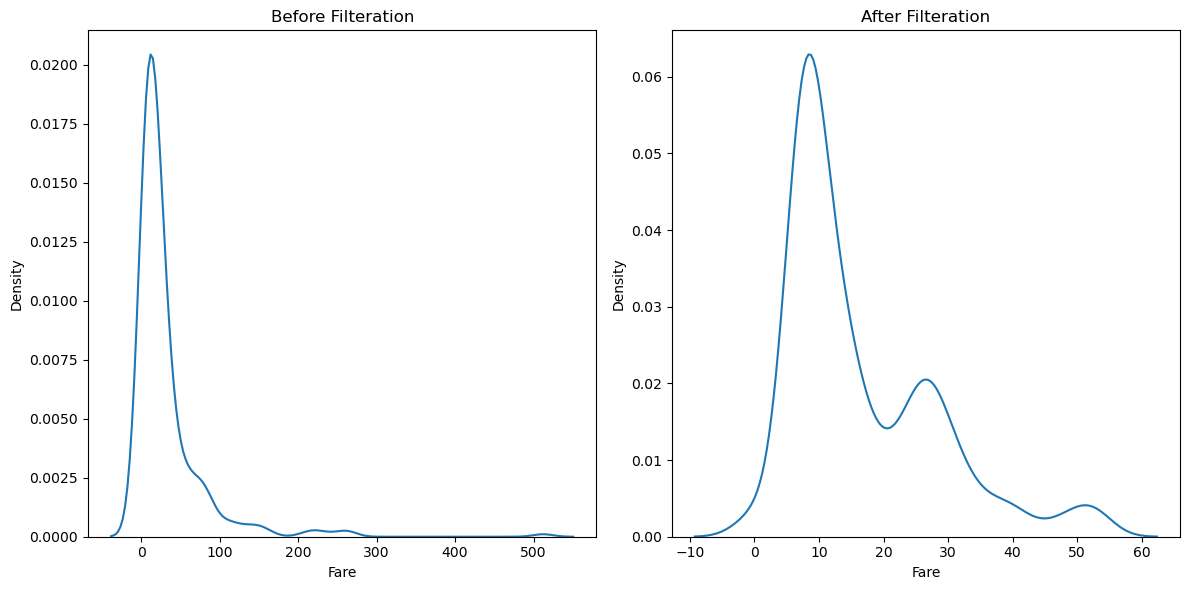

In [443]:
Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.65)

IQR_fare = Q3_fare - Q1_fare

lower_bound_fare = Q1_fare - 1.5*IQR_fare
upper_bound_fare = Q3_fare + 1.5*IQR_fare

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.kdeplot(df['Fare'], ax=axes[0])
axes[0].set_title('Before Filteration')

sns.kdeplot(df['Fare'][(df['Fare'] >= lower_bound_fare) & (df['Fare'] <= upper_bound_fare)], ax=axes[1])
axes[1].set_title('After Filteration')

plt.tight_layout()
plt.show()


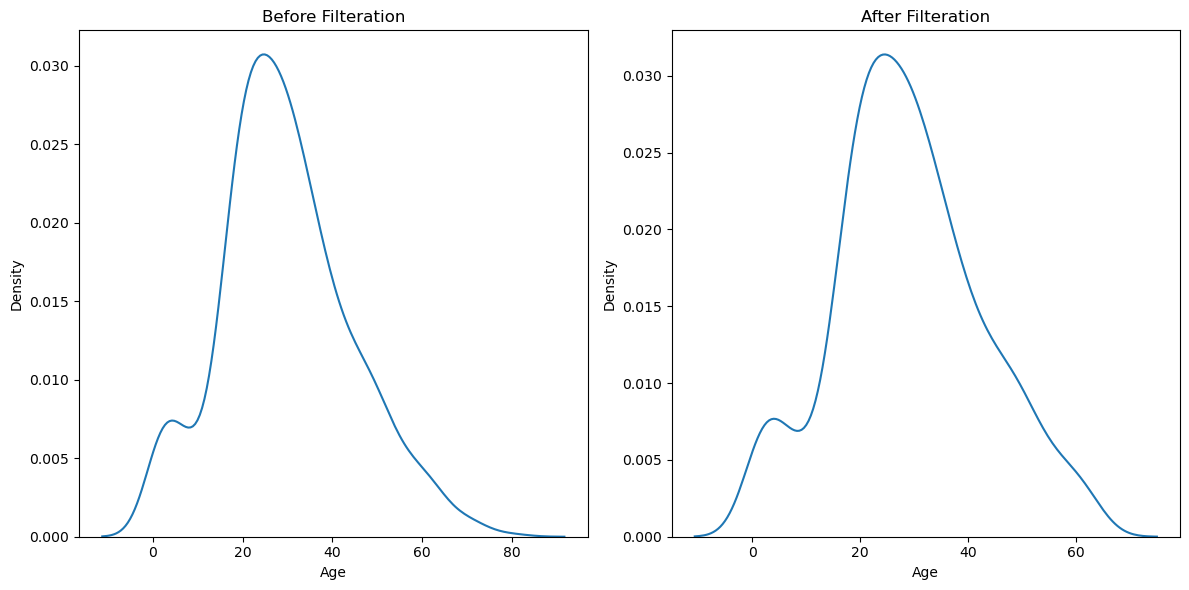

In [444]:
Q1_fare = df['Age'].quantile(0.25)
Q3_fare = df['Age'].quantile(0.75)

IQR_fare = Q3_fare - Q1_fare

lower_bound_fare = Q1_fare - 1.5*IQR_fare
upper_bound_fare = Q3_fare + 1.5*IQR_fare

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.kdeplot(df['Age'], ax=axes[0])
axes[0].set_title('Before Filteration')

sns.kdeplot(df['Age'][(df['Age'] >= lower_bound_fare) & (df['Age'] <= upper_bound_fare)], ax=axes[1])
axes[1].set_title('After Filteration')

plt.tight_layout()
plt.show()


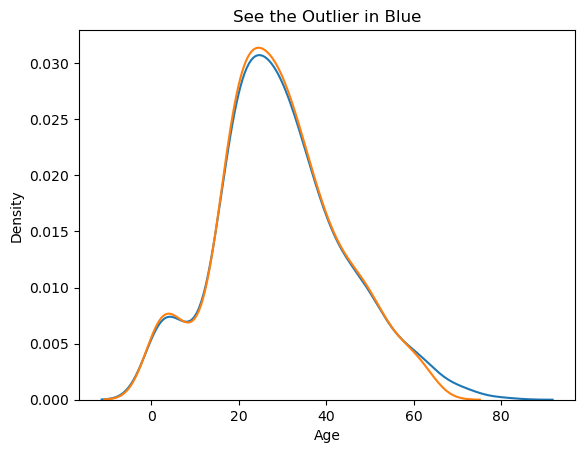

In [445]:
sns.kdeplot(df['Age'])
sns.kdeplot(df['Age'][(df['Age'] >= lower_bound_fare) & (df['Age'] <= upper_bound_fare)])
plt.title('See the Outlier in Blue')
plt.show()

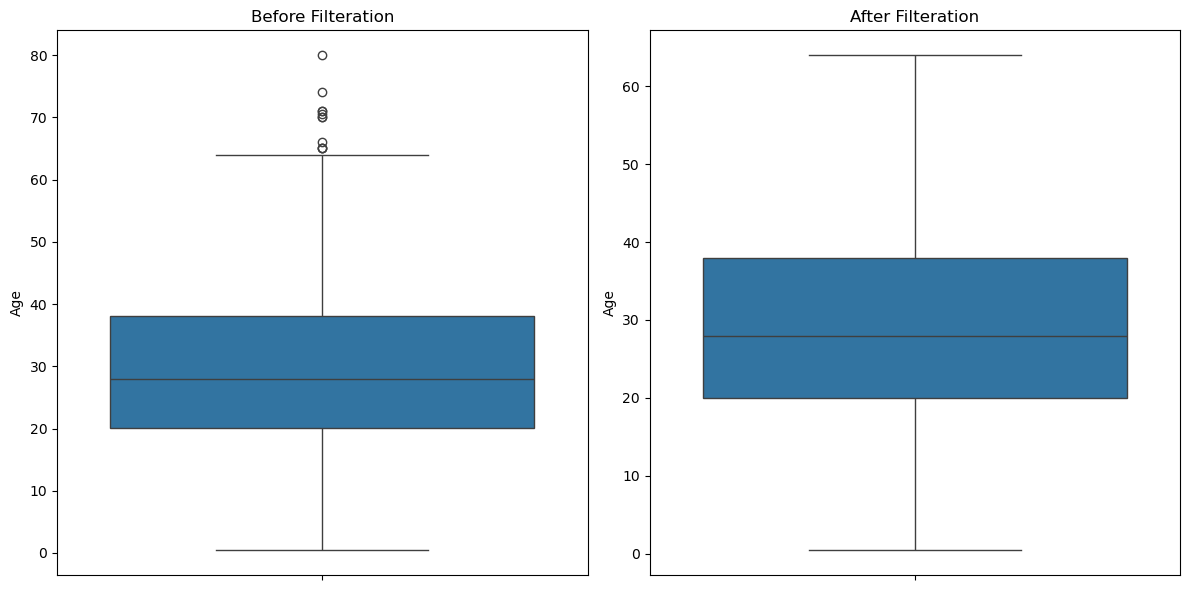

In [446]:


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(df['Age'], ax=axes[0])
axes[0].set_title('Before Filteration')

sns.boxplot(df['Age'][(df['Age'] >= lower_bound_fare) & (df['Age'] <= upper_bound_fare)], ax=axes[1])
axes[1].set_title('After Filteration')

plt.tight_layout()
plt.show()


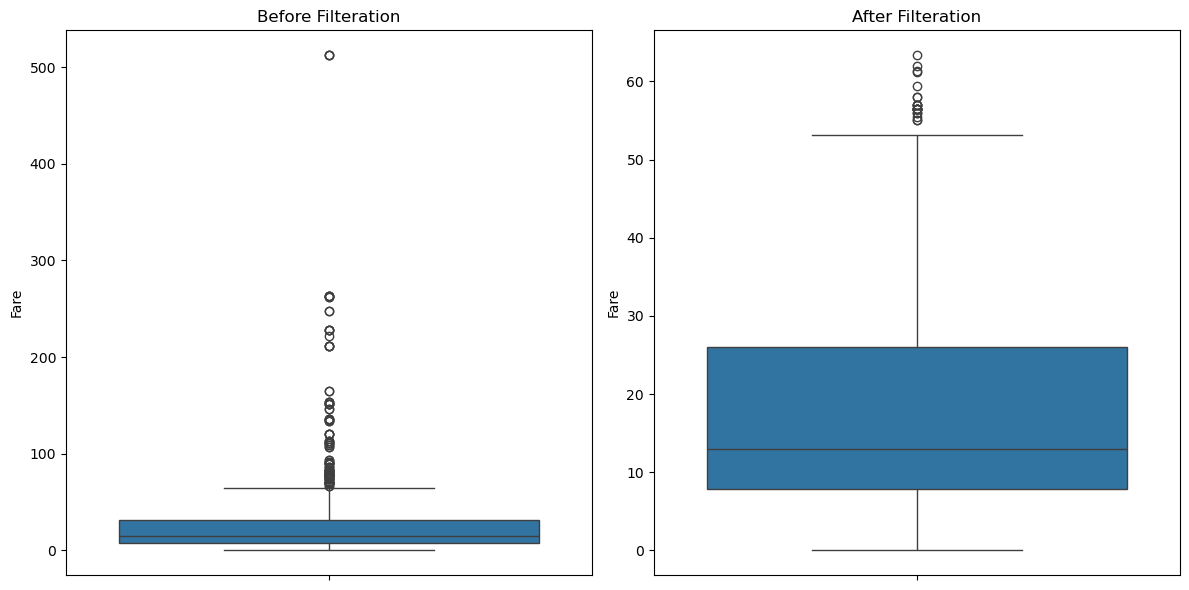

In [447]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(df['Fare'], ax=axes[0])
axes[0].set_title('Before Filteration')

sns.boxplot(df['Fare'][(df['Fare'] >= lower_bound_fare) & (df['Fare'] <= upper_bound_fare)], ax=axes[1])
axes[1].set_title('After Filteration')

plt.tight_layout()
plt.show()


## Bivariate

### Numerical -Numerical

In [448]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


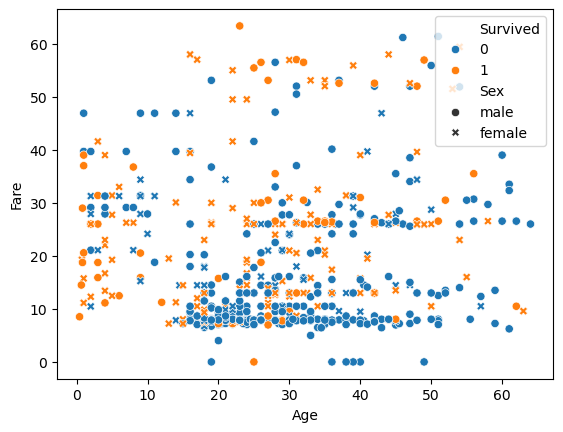

In [449]:
sns.scatterplot(x=df['Age'][(df['Age'] >= lower_bound_fare) & (df['Age'] <= upper_bound_fare)],y=df['Fare'][(df['Fare'] >= lower_bound_fare) & (df['Fare'] <= upper_bound_fare)], data=df, hue='Survived', style='Sex')
plt.show()

### Numerical-Categorical

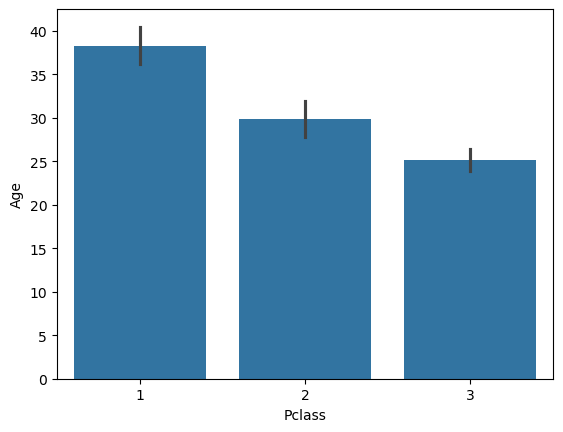

In [450]:
sns.barplot(x='Pclass', y='Age', data=df)
plt.show()

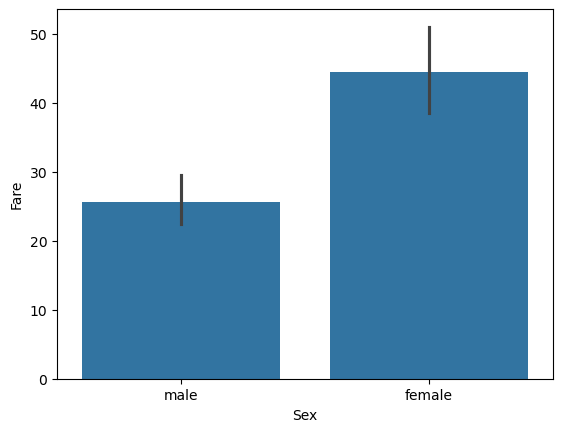

In [451]:
sns.barplot(y='Fare', x='Sex', data=df)
plt.show()

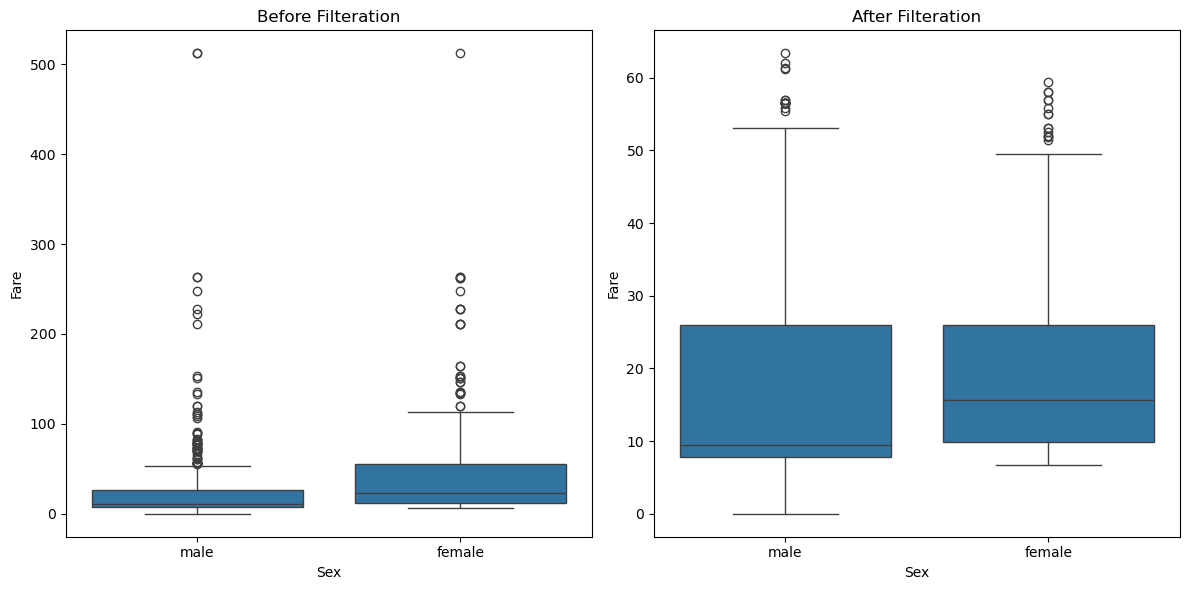

In [452]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x=df['Sex'],y=df['Fare'], ax=axes[0])
axes[0].set_title('Before Filteration')

sns.boxplot(x=df['Sex'],y= df['Fare'][(df['Fare'] >= lower_bound_fare) & (df['Fare'] <= upper_bound_fare)], ax=axes[1])
axes[1].set_title('After Filteration')

plt.tight_layout()
plt.show()


In [453]:
print(len(df[(df['Sex'] == 'female') & (df['Fare'] >= 200)]))


12


In [454]:
# show the data of those people who was died but was in 1st passenger Class
new_df = df[(df['Pclass']==1) & (df['Survived']==0)]
print(new_df.head())

    Survived  Pclass   Sex   Age  SibSp  Parch      Fare Embarked
6          0       1  male  54.0      0      0   51.8625        S
27         0       1  male  19.0      3      2  263.0000        S
30         0       1  male  40.0      0      0   27.7208        C
34         0       1  male  28.0      1      0   82.1708        C
35         0       1  male  42.0      1      0   52.0000        S


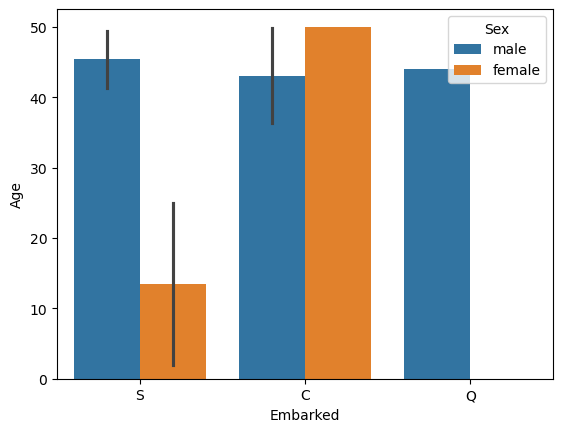

In [455]:
sns.barplot(x='Embarked', y='Age',data=new_df, hue='Sex')
plt.show()

## Creating Pipelines

#### impute missing values --> ohe --> scaling -->( not necessary feature selection ) --> decision tree

###  train and test split

In [456]:
X, y= df.drop(columns='Survived'), df['Survived']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(x_train.shape, y_train.shape)

(668, 7) (668,)


In [457]:
print(x_train.head())
print(x_train.isnull().sum())

     Pclass     Sex    Age  SibSp  Parch      Fare Embarked
298       1    male    NaN      0      0   30.5000        S
884       3    male  25.00      0      0    7.0500        S
247       2  female  24.00      0      2   14.5000        S
478       3    male  22.00      0      0    7.5208        S
305       1    male   0.92      1      2  151.5500        S
Pclass        0
Sex           0
Age         132
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


### SimpleImputer to fill NaN vals

In [458]:
px1 = ColumnTransformer([
    ('SimpleImputer', SimpleImputer(), [2]),
], remainder='passthrough')

### OneHotEncoder

In [507]:
px2 = ColumnTransformer([
    ('OneHotEncoder_sex_embarked', OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first', ), [1, 6]),  # Transform 'Sex' column
], remainder='passthrough')  
x_train['Sex'] = px2.fit_transform(x_train)
x_test['Sex'] = px2.fit_transform(x_test)
x_train['Embarked'] = px2.fit_transform(x_train)
x_test['Embarked'] = px2.fit_transform(x_test)
x_train

(668, 7)

## MinMaxScaler

In [460]:
px3 = ColumnTransformer([
    ('tnf1', MinMaxScaler(), [0,1,2,3,4,5,6])
], remainder='passthrough')

### Feature Selection

In [461]:
px4 = SelectKBest(score_func=chi2, k=10)

### Decision Tree Implementation

In [462]:
px5 = DecisionTreeClassifier()

## Implement Pipeline

In [463]:
pipe = Pipeline([
    ('px1', px1),
    ('px2', px2),
    ('px3', px3),
    ('px4', px4),
    ('px5', px5),
])

In [464]:
from sklearn import set_config
set_config(display='diagram')

In [504]:
pipe.fit(x_train, y_train)

c:\Users\saura\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(


Pipeline(steps=[('px1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1', SimpleImputer(),
                                                  [2])])),
                ('px2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1]),
                                                 ('tnf2',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [6])])),
                ('px3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tnf1', MinMaxScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6])])),
                ('px4',
                 SelectKBest(score_func=<function chi2 at 0x0000028FA98385E0>)),
                ('px5', DecisionTreeClassifier())])

In [466]:
print(pipe.named_steps)

{'px1': ColumnTransformer(remainder='passthrough',
                  transformers=[('tnf1', SimpleImputer(), [2])]), 'px2': ColumnTransformer(remainder='passthrough',
                  transformers=[('tnf1',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 [1]),
                                ('tnf2',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 [6])]), 'px3': ColumnTransformer(remainder='passthrough',
                  transformers=[('tnf1', MinMaxScaler(),
                                 [0, 1, 2, 3, 4, 5, 6])]), 'px4': SelectKBest(score_func=<function chi2 at 0x0000028FA98385E0>), 'px5': DecisionTreeClassifier()

## Label Encoder

In [467]:
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)
# y_test = le.fit(y_test)

In [468]:
y_pred = pipe.predict(x_test)
print(y_pred)

[0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0
 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1
 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1
 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1
 0]


In [469]:
from sklearn.metrics import accuracy_score
# print(accuracy_score(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

Accuracy: 73.09%


In [470]:
from sklearn.model_selection import cross_val_score
print(f"{cross_val_score(pipe, x_train, y_train, cv=5, scoring='accuracy').mean()*100:.2f}%")

c:\Users\saura\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(


76.80%


c:\Users\saura\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(
c:\Users\saura\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(
c:\Users\saura\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(
c:\Users\saura\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(


In [471]:
params = {
    'px5__max_depth':[1,2,3,4,5,None]
}

In [472]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv=4, scoring='accuracy')
grid.fit(x_train, y_train)

c:\Users\saura\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(
c:\Users\saura\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(
c:\Users\saura\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(
c:\Users\saura\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(
c:\Users\saura\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(
c:\Us

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('px1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('tnf1',
                                                                         SimpleImputer(),
                                                                         [2])])),
                                       ('px2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('tnf1',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         [1]),
                                                                        ('tnf2',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         [6])])),
                                       ('px3',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('tnf1',
                                                                         MinMaxScaler(),
                                                                         [0, 1,
                                                                          2, 3,
                                                                          4, 5,
                                                                          6])])),
                                       ('px4',
                                        SelectKBest(score_func=<function chi2 at 0x0000028FA98385E0>)),
                                       ('px5', DecisionTreeClassifier())]),
             param_grid={'px5__max_depth': [1, 2, 3, 4, 5, None]},
             scoring='accuracy')

In [473]:
print(grid.best_score_)
print(grid.best_params_)
print()

0.8218562874251497
{'px5__max_depth': 3}



In [474]:
print(x_train.columns)

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')


In [475]:
import pickle
pickle.dump(pipe, open('models/titanic_pipe.pkl', 'wb'))

In [486]:
pipe = pickle.load(open('models/titanic_pipe.pkl', 'rb'))
# Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'
test_input = np.array([1, 0, 21, 0, 0, 20, 1.0], dtype=object).reshape(1,7)

In [487]:
predicted_output = pipe.predict(test_input)
if 0 in predicted_output:
    print('Not Rescued')
else:
    print('Rescued')

Rescued


c:\Users\saura\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
